## Final Project Submission

Please fill out: 
* Student name: Eva Mizer
* Student pace: self paced
* Scheduled project review date/time: Mon, Jun 27, 2022, 11:00 AM - 11:45 AM
* Instructor name: Morgan Jones
* Blog post URL: TDB


## Import Libraries

In [15]:
import pandas as pd #to work with dataframes
import numpy as np #for any and all calculations
import sqlite3 #for working with SQL files to make dataframes


## Import Files

For this project we will import the following files:
* movieinfo, which is a great source for runtime, genres, and more
* reviews, which gives us ratings for specific movies as well as written reviews (though we will only be focusing on the ratings themselves)
* tmdb_movies, which gives us release date, among other things
* tn_movie_budgets, a great source for the money behind the machine (production, domestic and worldwide gross)
* imdb_db, an invaluable source of information with ratings, titles, genres, director information, and more!

In [16]:
movieinfo = pd.read_table('Data/rt.movie_info.tsv')
reviews = pd.read_csv('Data/rt.reviews.tsv', sep='\t', encoding='windows-1252')

tmdb_movies = pd.read_csv('Data/tmdb.movies.csv')

tn_movie_budgets = pd.read_csv('Data/tn.movie_budgets.csv')
imdb_db = sqlite3.connect('Data/imdb.db')


### **Let's look at the first few files...**

In [17]:
movieinfo.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [18]:
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [19]:
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


## They look great! Now let's combine! 


In [20]:
ratings_and_beyond = reviews.merge(movieinfo[['rating', 'genre', 'runtime', 'id']], on = 'id', how = 'left')
ratings_and_beyond = ratings_and_beyond.merge(tmdb_movies[['title', 'id']], on = 'id', how = 'left')
ratings_and_beyond = ratings_and_beyond.rename(columns={"id": "Id"}, errors="raise")
ratings_and_beyond

,Id,review,rating_x,fresh,critic,top_critic,publisher,date,rating_y,genre,runtime,title
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",R,Drama|Science Fiction and Fantasy,108 minutes,NaN
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018",R,Drama|Science Fiction and Fantasy,108 minutes,NaN
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018",R,Drama|Science Fiction and Fantasy,108 minutes,NaN
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017",R,Drama|Science Fiction and Fantasy,108 minutes,NaN
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017",R,Drama|Science Fiction and Fantasy,108 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
54582,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002",R,Action and Adventure|Art House and Internation...,94 minutes,NaN
54583,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005",R,Action and Adventure|Art House and Internation...,94 minutes,NaN
54584,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005",R,Action and Adventure|Art House and Internation...,94 minutes,NaN
54585,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003",R,Action and Adventure|Art House and Internation...,94 minutes,NaN


In [21]:
###convert date to just month, runtime to just minutes
ratings_and_beyond['date'] = pd.to_datetime(ratings_and_beyond['date'])
ratings_and_beyond['runtime'] = ratings_and_beyond['runtime'].str.replace(" minutes","")
ratings_and_beyond['runtime'] = pd.to_numeric(ratings_and_beyond['runtime'], downcast="integer")

###Nans need to be fixed

###Swap out Nans for average of the runtime column (only about 800 entries of over 54 thousand)
ratings_and_beyond['runtime'].fillna((ratings_and_beyond['runtime'].mean()), inplace=True)
ratings_and_beyond['runtime'] = ratings_and_beyond['runtime'].astype(int)

ratings_and_beyond

,Id,review,rating_x,fresh,critic,top_critic,publisher,date,rating_y,genre,runtime,title
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,2018-11-10,R,Drama|Science Fiction and Fantasy,108,NaN
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,2018-05-23,R,Drama|Science Fiction and Fantasy,108,NaN
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,2018-01-04,R,Drama|Science Fiction and Fantasy,108,NaN
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,2017-11-16,R,Drama|Science Fiction and Fantasy,108,NaN
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,2017-10-12,R,Drama|Science Fiction and Fantasy,108,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
54582,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,2002-09-24,R,Action and Adventure|Art House and Internation...,94,NaN
54583,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,2005-09-21,R,Action and Adventure|Art House and Internation...,94,NaN
54584,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,2005-07-17,R,Action and Adventure|Art House and Internation...,94,NaN
54585,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,2003-09-07,R,Action and Adventure|Art House and Internation...,94,NaN


### Uniforming the ratings...

Let's see what rating_x is made of and give us an idea of how easy it would be to convert the cells to be uniform.

In [22]:
ratings_and_beyond['rating_x'].value_counts()

3/5    4335
4/5    3674
3/4    3579
2/5    3173
2/4    2736
       ... 
5.9       1
8.4       1
9.0       1
1.8       1
8.9       1
Name: rating_x, Length: 186, dtype: int64

### Reclculating... 
Wow... The excessive amount of variable types in ratings_and_beyond is proving to be problematic for the timeframe (and knowledgebase) we have. Instead, we can focus on the ratings from our IMDB file featured later.
**Now we look at tn_movie_budgets, a great resource for the real dollars and cents!**


In [23]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


**Time to convert some currency to floats, and simplify the titles for tn_movie_budgets!**

In [24]:
tn_movie_budgets[tn_movie_budgets.columns[3:]] = tn_movie_budgets[tn_movie_budgets.columns[3:]].replace('[\$,]', '', regex=True).astype(float)
tn_movie_budgets = tn_movie_budgets.rename(columns={"movie": "title"}, errors="raise")
tn_movie_budgets.columns = tn_movie_budgets.columns.str.capitalize()
tn_movie_budgets

,Id,Release_date,Title,Production_budget,Domestic_gross,Worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [25]:
tn_movie_budgets_the_runaways = tn_movie_budgets[tn_movie_budgets['Title'].str.contains('Runaways')]
tn_movie_budgets_the_runaways

,Id,Release_date,Title,Production_budget,Domestic_gross,Worldwide_gross
3756,57,"Mar 19, 2010",The Runaways,9500000.0,3573673.0,5278632.0


**FUN! Now, let's combine tn_movie with some others, shall we?**


In [26]:
movie_budgets = tn_movie_budgets.merge(ratings_and_beyond[['rating_x', 'rating_y', 'Id']], on = 'Id', how = 'left')
movie_budgets = movie_budgets.drop_duplicates(subset=['Title'], inplace=False)
movie_budgets = movie_budgets.rename(columns={"rating_x": "rt_rating", "rating_y": "pa_rating"}, errors="raise")
movie_budgets['Release_date'] = pd.to_datetime(movie_budgets['Release_date']).dt.month
movie_budgets

,Id,Release_date,Title,Production_budget,Domestic_gross,Worldwide_gross,rt_rating,pa_rating
0,1,12,Avatar,425000000.0,760507625.0,2.776345e+09,NaN,NaN
1,2,5,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,NaN,NaN
2,3,6,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,3/5,R
165,4,5,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,NaN,NaN
166,5,12,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,NaN,R
...,...,...,...,...,...,...,...,...
187277,78,12,Red 11,7000.0,0.0,0.000000e+00,NaN,NaN
187278,79,4,Following,6000.0,48482.0,2.404950e+05,B-,R
187296,80,7,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,B-,NR
187311,81,9,A Plague So Pleasant,1400.0,0.0,0.000000e+00,NaN,NaN


In [27]:
print("Parental advisory Nans:", movie_budgets['pa_rating'].isna().sum(), "of", movie_budgets.shape[0])
print("Rotten Tomatoes Nans:", movie_budgets['rt_rating'].isna().sum(), "of", movie_budgets.shape[0])

Parental advisory Nans: 2391 of 5698
Rotten Tomatoes Nans: 3416 of 5698


Since nearly half of the parental advosiry cells are made up of Nans and well over half of the Rotten Tomatoes ratings are Nans, I have chosen to move on to using other data I have to gain insight.

Now that we have out movie_budgets and ratings_and_beyond, let's look at our final bit of data. 


In [28]:
imdb_db2 = pd.read_sql("""
SELECT 
    movie_basics.primary_title,
    movie_basics.original_title,
    movie_ratings.averagerating,
    movie_basics.runtime_minutes,
    movie_basics.start_year,
    movie_basics.genres, 
    movie_akas.region,
    principals.category, 
    persons.primary_name
  FROM movie_basics
  JOIN movie_ratings
      USING (movie_id)
  JOIN movie_akas
      USING (movie_id)
  JOIN principals
      USING (movie_id)
  JOIN persons
      USING (person_id)
      WHERE category = "director"
 ;
""", imdb_db)
imdb_db2 =  imdb_db2.rename(columns={"primary_title": "Title"}, errors="raise")
imdb_db2

DatabaseError: Execution failed on sql '
SELECT 
    movie_basics.primary_title,
    movie_basics.original_title,
    movie_ratings.averagerating,
    movie_basics.runtime_minutes,
    movie_basics.start_year,
    movie_basics.genres, 
    movie_akas.region,
    principals.category, 
    persons.primary_name
  FROM movie_basics
  JOIN movie_ratings
      USING (movie_id)
  JOIN movie_akas
      USING (movie_id)
  JOIN principals
      USING (movie_id)
  JOIN persons
      USING (person_id)
      WHERE category = "director"
 ;
': no such table: movie_basics

Gorgeous! Now let's merge it with our movie budgets data!

In [29]:
merge_it = movie_budgets.merge(imdb_db2[['averagerating', 'runtime_minutes', 'genres', 'Title']], on = 'Title', how = 'left')
merge_it = merge_it.drop_duplicates(subset=['Title'], inplace=False)
merge_it


NameError: name 'imdb_db2' is not defined

# Calulations And Visuals

Now let's take all those dataframes and really work some magic!


In [30]:
import matplotlib.pyplot as plt

## All things money... (movie_budgets)
 
           *Budgets - Worst Case, Best Case, Average Case¶
           *Budget vs. ROI
           *Budget vs. Gross Worldwide
           *Release Date vs. Domestic Gross
  

## Budgets - Worst Case, Best Case, Average Case

In [31]:
bghighlow = merge_it[['Production_budget']].copy()
bghighlow= bghighlow.reset_index()
bghighlow = bghighlow.astype(float)
bghighlow = bghighlow//1000000 ###divided by 1 million for simplicity in reading

bghighlow

NameError: name 'merge_it' is not defined

In [32]:
#Let's simplify by taking out some of the outliers 

#Detection:
# IQR
Q1 = np.percentile(bghighlow['Production_budget'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(bghighlow['Production_budget'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", bghighlow.shape)
 
# Upper bound
upper = np.where(bghighlow['Production_budget'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(bghighlow['Production_budget'] <= (Q1-1.5*IQR))
 
#Remove the outliers!!!
bghighlow.drop(upper[0], inplace = True)
bghighlow.drop(lower[0], inplace = True)
 
print("New Shape: ", bghighlow.shape)

NameError: name 'bghighlow' is not defined

In [33]:
print("Minimum budget:", "$", bghighlow['Production_budget'].min().round(decimals = 2))
print("Maximum budget:", "$", bghighlow['Production_budget'].max().round(decimals = 2))
print("Median budget:", "$", bghighlow['Production_budget'].median().round(decimals = 2))
print("Average budget:", "$", bghighlow['Production_budget'].mean().round(decimals = 0))



NameError: name 'bghighlow' is not defined

### Conclusion:
Expect to spend around 22 million dollars.

## Budget vs. Gross Worldwide

In [34]:
# budget and how compares to gross worldwide

bghighlow_wg = movie_budgets[['Production_budget', 'Worldwide_gross']].copy()
bghighlow_wg = bghighlow_wg.reset_index() #let's clean up this index!
bghighlow_wg = bghighlow_wg.sort_values(by="Production_budget")
bghighlow_wg = bghighlow_wg.astype(float)
bghighlow_wg = bghighlow_wg//1000000 ###divided by 1 million for simplicity in reading
bghighlow_wg

,index,Production_budget,Worldwide_gross
5697,0.0,0.0,0.0
5696,0.0,0.0,0.0
5695,0.0,0.0,0.0
5694,0.0,0.0,0.0
5692,0.0,0.0,0.0
...,...,...,...
4,0.0,317.0,1316.0
3,0.0,330.0,1403.0
2,0.0,350.0,149.0
1,0.0,410.0,1045.0


In [35]:
#Let's simplify by taking out some of the outliers 

#Detection:
# IQR
Q1 = np.percentile(bghighlow_wg['Production_budget'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(bghighlow_wg['Production_budget'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", bghighlow_wg.shape)
 
# Upper bound
upper = np.where(bghighlow_wg['Production_budget'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(bghighlow_wg['Production_budget'] <= (Q1-1.5*IQR))
 
#Remove the outliers!!!
bghighlow_wg.drop(upper[0], inplace = True)
bghighlow_wg.drop(lower[0], inplace = True)
 
print("New Shape: ", bghighlow_wg.shape)

Old Shape:  (5698, 3)
New Shape:  (5269, 3)


In [36]:
bghighlow_wg_mean = bghighlow_wg.groupby('Production_budget').mean()
bghighlow_wg_mean['Production_budget'] = bghighlow_wg_mean.index
print("With a budget of", bghighlow['Production_budget'].mean().round(decimals = 0), "million dollars, you can expect an average worldwide gross of ",bghighlow_wg_mean['Worldwide_gross'][23].round(2), "million dollars.")


NameError: name 'bghighlow' is not defined

In [37]:
bghighlow_wg

,index,Production_budget,Worldwide_gross
5268,0.0,0.0,0.0
5267,0.0,0.0,6.0
5266,0.0,0.0,0.0
5262,0.0,0.0,0.0
5261,0.0,0.0,8.0
...,...,...,...
4,0.0,317.0,1316.0
3,0.0,330.0,1403.0
2,0.0,350.0,149.0
1,0.0,410.0,1045.0


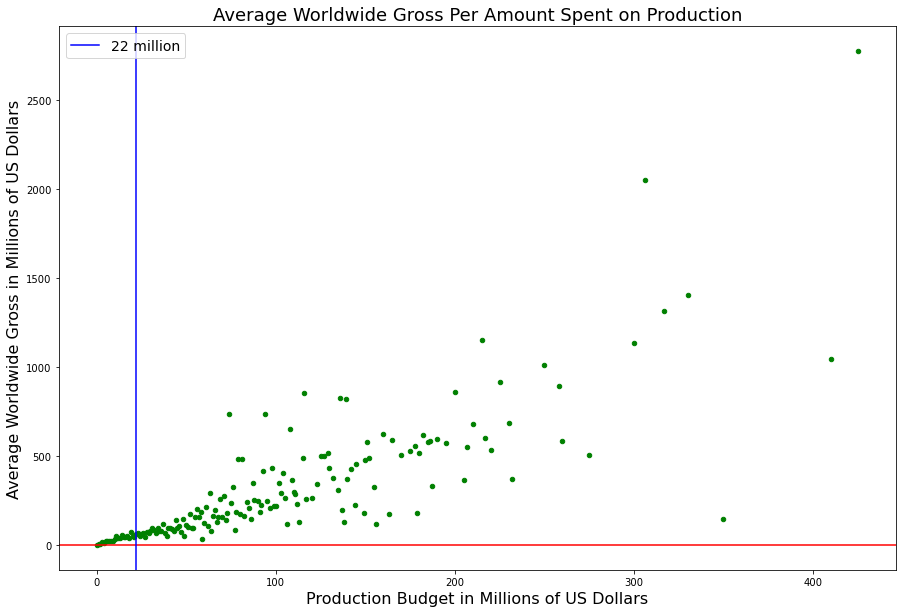

In [38]:
bghighlow_wg_mean.plot.scatter(figsize=(15,10),x='Production_budget',y='Worldwide_gross', color='green')
plt.title('Average Worldwide Gross Per Amount Spent on Production', fontsize=18)
plt.xlabel('Production Budget in Millions of US Dollars', fontsize=16)
plt.ylabel('Average Worldwide Gross in Millions of US Dollars', fontsize=16)

plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.axvline(x = 22, color = 'b', label = '22 million')
plt.legend(loc = 'upper left', prop={"size":14})



### Conclusion
This does seem to indicate that there is a slight inclination of higher gross paired with production higher budget - the more you put in, the more you are likely to get out. However, after about 32 million (see blue line), the correlation gets a little looser and the more varience you see with 

## Budget vs. ROI

In [39]:
bghighlow_dg = merge_it[['Production_budget', 'Domestic_gross']].copy()
bghighlow_dg['ROI'] = bghighlow_dg['Domestic_gross'] - bghighlow_dg['Production_budget']
bghighlow_dg= bghighlow_dg.reset_index()
bghighlow_dg = bghighlow_dg.astype(float)
bghighlow_dg = bghighlow_dg//1000000 ###divided by 1 million for simplicity in reading

bghighlow_dg

NameError: name 'merge_it' is not defined

In [40]:
#Let's simplify by taking out some of the outliers 

#Detection:
# IQR
Q1 = np.percentile(bghighlow_dg['Production_budget'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(bghighlow_dg['Production_budget'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

#Check it!
print("Old Shape: ", bghighlow_dg.shape)
 
# Upper bound
upper = np.where(bghighlow_dg['Production_budget'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(bghighlow_dg['Production_budget'] <= (Q1-1.5*IQR))
 
#Remove the outliers!!!
bghighlow_dg.drop(upper[0], inplace = True)
bghighlow_dg.drop(lower[0], inplace = True)

#Check it!
print("New Shape: ", bghighlow_dg.shape)

NameError: name 'bghighlow_dg' is not defined

In [41]:
bghighlow_dg_mean = bghighlow_dg.copy()
bghighlow_dg_mean = bghighlow_dg_mean.drop(columns='Domestic_gross')
bghighlow_dg_mean = bghighlow_dg_mean.groupby('Production_budget').mean()
bghighlow_dg_mean['Production_budget'] = bghighlow_dg_mean.index

NameError: name 'bghighlow_dg' is not defined

In [42]:
bghighlow_dg_mean.plot.scatter(figsize=(10,8), x='Production_budget', y='ROI', color="green")
plt.title('Return on Investment Per Amount Spent on Production', fontsize=14)
plt.xlabel('Production Budget in Millions of US Dollars', fontsize=12)
plt.ylabel('Average Return on Investment in Millions of US Dollars', fontsize=12)
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.axvline(x = 22, color = 'b', label = '22 million')

plt.legend(loc = 'upper left',fontsize=12)

NameError: name 'bghighlow_dg_mean' is not defined

In [43]:
bghighlow_dg_mean['ROI'][23].round(1)##our average, plus one to accound for the index value of 0


NameError: name 'bghighlow_dg_mean' is not defined

### Conclusion
The data shows that average return on investment is pretty steady and consistent up until about $30 million dollars, where the results can be more dramatic and sporatic for both for profit and loss. With a budget of 22 million dollars, you can expect and average ROI between 14.5 million dollars. 

### Release Date vs. Domestic Gross

In [44]:

released_dg = movie_budgets[['Release_date', 'Domestic_gross']].copy()
released_dg_avg = released_dg.groupby('Release_date')['Domestic_gross'].mean()
released_dg_avg = released_dg_avg.round(decimals = 0)
released_dg_avg = released_dg_avg.astype(float)
released_dg_avg = released_dg_avg//1000000 ###divided by 1 million for simplicity in reading
#released_dg_avg = released_dg_avg.dt.month_name()
released_dg_avg = released_dg_avg.rename(index={1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec' })
released_dg_avg

Release_date
Jan     23.0
Feb     35.0
Mar     38.0
Apr     27.0
May     66.0
Jun     66.0
July    60.0
Aug     32.0
Sep     23.0
Oct     24.0
Nov     57.0
Dec     46.0
Name: Domestic_gross, dtype: float64

Text(0, 0.5, 'Average Domestic Gross in Millions of US Dollars')

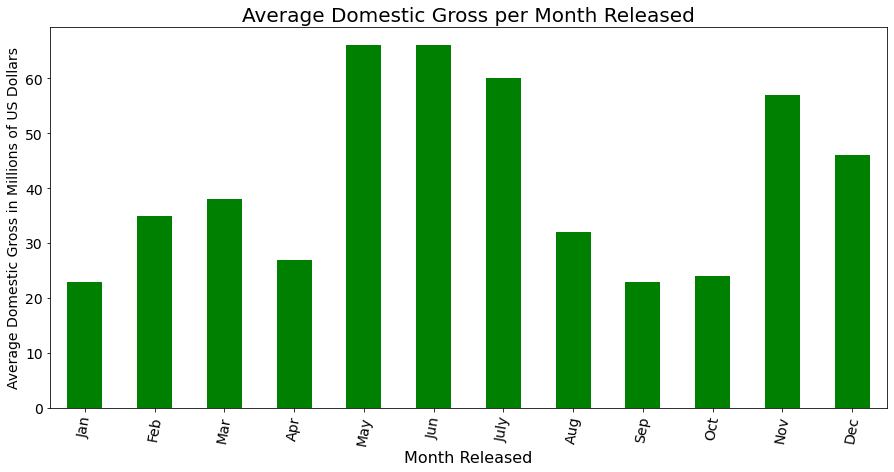

In [45]:
released_dg_avg.plot.bar(
    figsize=(15,7), 
    x="Month Released", 
    y="Domestic Gross in Millions", 
    rot=80,  
    color='green',
    fontsize = 14);
plt.title("Average Domestic Gross per Month Released", fontsize=20)
plt.xlabel('Month Released', fontsize=16)
plt.ylabel('Average Domestic Gross in Millions of US Dollars', fontsize=14)


### Conclusion:
It appears the best months to release a movie would be May and June in the summer, followed closely by July. If a film needs to be released any other time, it's advisable to release in November.

## The What, Who, and How - merge_it
            *Average Domestic Gross Per Genre
            *Average Rating Vs. Runtime
            *Average Domestic Gross By Average Rating
            *Average Rating Per Director

## Average Domestic Gross Per Genre

In [46]:
avrgrs_genre = merge_it[['genres', 'Domestic_gross']].copy()
avrgrs_genre = avrgrs_genre.dropna(subset=['genres'])
avrgrs_genre = avrgrs_genre[avrgrs_genre.Domestic_gross != 0]


NameError: name 'merge_it' is not defined

In [47]:
#We have multiple listings in many genres cell, so we want to break it up so we can calculate the mean for each genre
avrgrs_genre

NameError: name 'avrgrs_genre' is not defined

In [48]:
#Make a loop to look for individual genres, make a list, then concat it!
genres=['Romance', 'Family', 'Music', 'Sport', 'Biography', 'History', 'Documentary', 'Mystery', 'Thriller', 'Comedy', 'Drama', 'Fantasy', 'Horror', 'Sci_Fi', 'Action', 'Adventure', 'Crime']
Genre_collection = []

for genre in genres:
    ComboGenre = avrgrs_genre[avrgrs_genre['genres'].str.contains(genre)]
    ComboGenre = ComboGenre.drop(columns='genres')
    ComboGenre = ComboGenre.assign(genres=genre)
    Genre_collection.append(ComboGenre)
    
#Now concat it, calculate the mean for each genre, then divide by a million for legibility
grande_avrgrs_genre = pd.concat(Genre_collection)
grande_avrgrs_genre = grande_avrgrs_genre.groupby('genres').mean()
grande_avrgrs_genre['Domestic_gross'] = grande_avrgrs_genre['Domestic_gross']//1000000
grande_avrgrs_genre


NameError: name 'avrgrs_genre' is not defined

In [49]:
grande_avrgrs_genre.plot.bar(stacked=True, figsize=(15,7), y='Domestic_gross', color='green', fontsize=14)
plt.title('Average Domestic Gross by Genre', fontsize=20)
plt.xlabel('Genres', fontsize=16)
plt.ylabel('Average Domestic Gross in Millions of US Dollars', fontsize=14)


NameError: name 'grande_avrgrs_genre' is not defined

### Conclusion:
Adventure, Sci-fi, and Action are the top three highest grossing genres, followed closely by Family and Fantasy. 


## Average Budget, Domestic Gross and Worldwide Gross Vs. Parental Advisory Rating


In [50]:
prarental_advirsory_ratings = movie_budgets[['Production_budget', 'Domestic_gross', 'Worldwide_gross', 'pa_rating']]##New df with 
prarental_advirsory_ratings = prarental_advirsory_ratings.dropna(subset=['pa_rating'])##Take out all the Nans
prarental_advirsory_ratings = prarental_advirsory_ratings.groupby('pa_rating').mean()##Getting the averages for each rating
prarental_advirsory_ratings = prarental_advirsory_ratings//1000000##dividing for the millions
prarental_advirsory_ratings['pa_rating']=prarental_advirsory_ratings.index##Making a new column with the pa_ratings
prarental_advirsory_ratings = prarental_advirsory_ratings.drop(['NR'], axis=0)##Dropping unrated films
prarental_advirsory_ratings

,Production_budget,Domestic_gross,Worldwide_gross,pa_rating
pa_rating,,,,
G,32.0,46.0,99.0,G
PG,31.0,40.0,86.0,PG
PG-13,32.0,41.0,94.0,PG-13
R,31.0,42.0,92.0,R


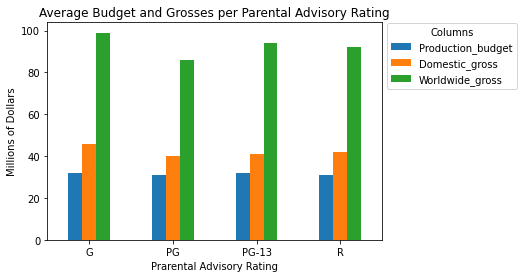

In [51]:
ax = prarental_advirsory_ratings.plot(
    kind='bar', 
    rot=0, 
    xlabel='Prarental Advisory Rating', 
    ylabel='Millions of Dollars', 
    title='Average Budget and Grosses per Parental Advisory Rating', 
    figsize=(6, 4))

# move the legend out of the plot
ax.legend(title='Columns', bbox_to_anchor=(1, 1.02), loc='upper left')
##I found this very helpful code from Trenton McKinney on Stack Overflow
##Find his coding here: 
##https://stackoverflow.com/questions/14270391/python-matplotlib-multiple-bars 
##(about three quarters the way down)

### Conclusion
I am very surprised to see that though each category had pretty consistent budgets, films rated G came out on top, closely followed by PG-13 and R.

## Average Rating Vs. Runtime

In [52]:
# average rating per run time
avgrat_runtime = merge_it[['averagerating', 'runtime_minutes']].copy()
avgrat_runtime = avgrat_runtime.dropna(subset=['averagerating'])
avgrat_runtime = avgrat_runtime.dropna(subset=['runtime_minutes'])

avgrat_runtime = avgrat_runtime.groupby('runtime_minutes').mean()
avgrat_runtime['runtime_minutes']= avgrat_runtime.index ## new column for runtime min
avgrat_runtime


NameError: name 'merge_it' is not defined

In [53]:
avgrat_runtime.plot.scatter(x='runtime_minutes',y='averagerating', color='green')
plt.title('Average Ratings per Runtime in Minutes')
plt.xlabel('Runtime in Minutes')
plt.ylabel('Average Rating')


NameError: name 'avgrat_runtime' is not defined

### Conclusion
Between 55-65 minutes, or between 100-145 minutes, seems to yeild the most consistently high marks. 

## Average Domestic Gross By Average Rating

In [54]:
#Average Domestic gross by average rating
avrgrt_domg = merge_it[['averagerating', 'Domestic_gross']].copy()
avrgrt_domg = avrgrt_domg.dropna(subset=['averagerating'])
avrgrt_domg = avrgrt_domg.groupby('averagerating').mean()
avrgrt_domg['Domestic_gross'] = avrgrt_domg['Domestic_gross']//1000000 ### simplicity to millions
avrgrt_domg = avrgrt_domg[avrgrt_domg.Domestic_gross != 0]
avrgrt_domg['averagerating']= avrgrt_domg.index ## new column for average rating
avrgrt_domg

NameError: name 'merge_it' is not defined

In [55]:
avrgrt_domg.plot.scatter(x='averagerating', y='Domestic_gross', color='green')
plt.title('Average Domestic Gross per Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Average Domestic Gross in Millions of US Dollars')

NameError: name 'avrgrt_domg' is not defined

### Conclusion:
Generally the data shows that the higher rated a film is, the more money it is set to bring in! However, even highly rated films are not guaranteed to gross more than a lower rated film. 

### Average Rating Per Director
Let's find a good director to bring your movie to life!

In [56]:
adventure_directors = imdb_db2.copy()
adventure_directors = adventure_directors.dropna(subset=['genres'])
adventure_directors = adventure_directors[adventure_directors['genres'].str.contains("Adventure")]
adventure_directors = adventure_directors.drop(axis=1, columns = ['Title','original_title','runtime_minutes', 'start_year', 'genres', 'category'])
adventure_directors = adventure_directors.groupby('primary_name').mean()
adventure_directors = adventure_directors['averagerating'].sort_values()
adventure_directors

### Top 20 Adventure Directors
adventure_directors_top20 = adventure_directors.nlargest(n=20)
adventure_directors_top20

NameError: name 'imdb_db2' is not defined

### Conclusion: 
Though he is on the bottom of the top 20 rated directors for Adventure, I would reccomend Richard Heap, as his most recent work, The Runaways, received multiple awards, and he has extensive experience as an editor, director, and cinematographer. 

## And there you have it!
All the fun calculations, tricks, and visuals to bring this project to life! Thanks for joining me!